In [1]:
import os, shutil

In [13]:
original_dataset_dir = 'D:/Programming/Python/Scratch/Keras/datasets/train'

In [5]:
base_dir = 'D:\Programming\Python\Scratch\Keras\datasets\small_dog_cat'
# os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [12]:
original_dataset_dir

'D:\\Programming\\Python\\Scratch\\Keras\\datasets\train'

In [14]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [17]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [18]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [19]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [21]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 115s 1s/step - loss: 0.6880 - acc: 0.5415 - val_loss: 0.6776 - val_acc: 0.5880
Epoch 2/30
100/100 [==============================] - 90s 904ms/step - loss: 0.6656 - acc: 0.6025 - val_loss: 0.6435 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 91s 909ms/step - loss: 0.6198 - acc: 0.6590 - val_loss: 0.6370 - val_acc: 0.6220
Epoch 4/30
100/100 [==============================] - 90s 901ms/step - loss: 0.5865 - acc: 0.6840 - val_loss: 0.5973 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 90s 905ms/step - loss: 0.5425 - acc: 0.7155 - val_loss: 0.5900 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 90s 900ms/step - loss: 0.5189 - acc: 0.7325 - val_loss: 0.5776 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 90s 902ms/step - loss: 0.4958 - acc: 0.7575 - val_loss: 0.5588 - val_acc: 0.7140
Epoch 8/3

In [30]:
model.save('cats_and_dogs_small_1.h5')

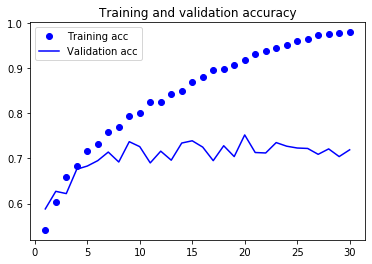

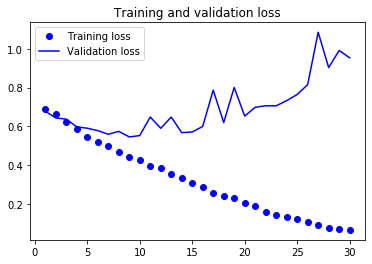

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
plt.show()

In [34]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

In [35]:
from keras.preprocessing import image

In [36]:
fnames = [os.path.join(train_cats_dir, fname) for
            fname in os.listdir(train_cats_dir)]

In [41]:
img_path = fnames[3]

In [42]:
img = image.load_img(img_path, target_size=(150, 150))

In [43]:
x = image.img_to_array(img)

In [45]:
x = x.reshape((1,) + x.shape)

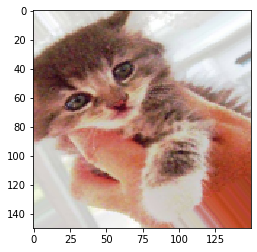

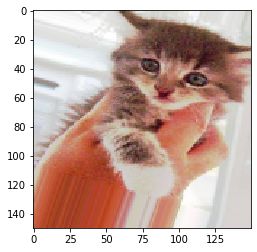

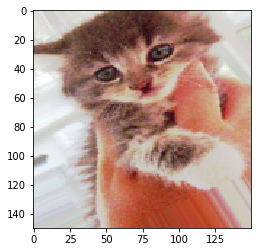

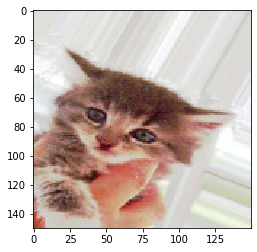

In [46]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
            input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [49]:
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [50]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 193s 2s/step - loss: 0.6955 - acc: 0.5116 - val_loss: 0.6847 - val_acc: 0.5025
Epoch 2/100
100/100 [==============================] - 78s 781ms/step - loss: 0.6935 - acc: 0.5381 - val_loss: 0.6849 - val_acc: 0.5354
Epoch 3/100
100/100 [==============================] - 79s 789ms/step - loss: 0.6793 - acc: 0.5744 - val_loss: 0.6749 - val_acc: 0.5819
Epoch 4/100
100/100 [==============================] - 79s 786ms/step - loss: 0.6773 - acc: 0.5719 - val_loss: 0.6827 - val_acc: 0.5354
Epoch 5/100
100/100 [==============================] - 81s 810ms/step - loss: 0.6627 - acc: 0.5888 - val_loss: 0.6347 - val_acc: 0.6168
Epoch 6/100
100/100 [==============================] - 79s 788ms/step - loss: 0.6499 - acc: 0.6134 - val_loss: 0.6362 - val_acc: 0.6070
Epoch 7/100
100/100 [==============================] - 79s 786ms/step - loss: 0.6418 - acc: 0.6228 - val_loss: 0.6258 - val_acc: 0.6516
Epoch 8/100
100/100 [=============================

KeyboardInterrupt: 

In [54]:
model.save('cats_and_dogs_small_2.h5')

In [55]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [59]:
img_path = 'D:/Programming/Python/Scratch/Keras/datasets/small_dog_cat/test/cats/cat.1700.jpg'

In [57]:
from keras.preprocessing import image
import numpy as np

In [60]:
img = image.load_img(img_path, target_size=(150, 150))

In [61]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

In [62]:
img_tensor /= 255.

In [63]:
print(img_tensor.shape)

(1, 150, 150, 3)


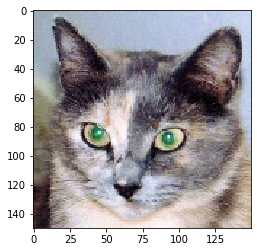

In [64]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()